In [1]:
# encoding=utf8

# Principal Component Analysis, PCA

PCA - Principle Component Analysis . 

From the m independent variables ,PCA extracts p<=m new independent variables that explains most the variance of the dataset regardless of dependent variable. As dependent variable is not considered ,this makes PCA an UNSUPERVISED Model.


# Task 1

In Classification, we worked with datasets composed of only two independent variables. We did for two reasons:

+ 1-Because we needed two dimensions to visualize better how Machine Learning models worked (by plotting the prediction regions and the prediction boundary for each model).
+ 2-Because whatever is the original number of our independent variables, we can often end up with two independent variables by applying an appropriate Dimensionality Reduction technique.

Types of Dimensionality Reduction techniques:

+ 1-Feature Selection      
+ 2-Feature Extraction 

Feature Selection techniques are Backward Elimination, Forward Selection, Bidirectional Elimination, Score Comparison and more. We covered these techniques in Regression.

Following are the Feature Extraction techniques:

+ Principal Component Analysis (PCA)    
+ Linear Discriminant Analysis (LDA)
+ Kernel PCA          
+ Quadratic Discriminant Analysis (QDA)



## PCA - Principle Component Analysis

From the m indep. variables ,PCA extracts p<=m new indep. variables that explain most the variance of the dataset regardless of dependent var.
As dep. var. DV is not considered ,this makes PCA an UNSUPERVISED MODEL



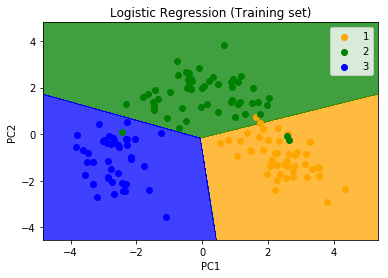

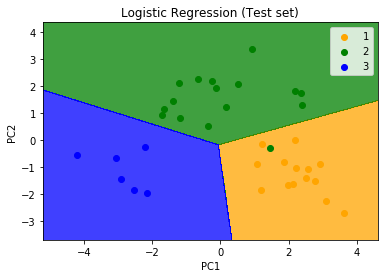

In [4]:
#PCA 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv('../../DataSets/pybk012master/Wine.csv')
x=dataset.iloc[:,0:13].values
y=dataset.iloc[:,13].values

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x = LabelEncoder()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

#Applying PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components = None)
pca = PCA (n_components = 2)
x_train =  pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
#we gather info about the num. of PC we need to use and replace none by that num.

#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(x_train,y_train)

#predict the test set results
y_pred = classifier.predict(x_test)

#making the confusion matrix(correct vs incorrect predictions that our model made)
from sklearn.metrics import confusion_matrix
#here the confusion_matrix is a class
cm = confusion_matrix(y_test,y_pred)

#visualising the trainig set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green','blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('orange', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green','blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('orange', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [5]:
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

# Task 2